In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv ('house-votes-84.data', delimiter = ',', header=None, names = ['party', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] )


In [43]:
#Data Cleaning - might need a bit more cleaning
for i in range (1, 17):
    df[i].replace ( to_replace = ['?'], value = df[i].mode().iloc[0], inplace = True)
    df[i] = LabelEncoder().fit_transform (df[i])

In [44]:
df.head()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [45]:
#First KNN
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier (n_neighbors = 6)

# Fit the classifier to the data
knn.fit (X, y)

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X)

In [46]:
'''
Confusion matrix
True Position     False Negative
False Position    True Negative
'''
#Confusion matrix in scikit-learn
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier (n_neighbors = 8)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4, random_state = 42)
knn.fit (X_train, y_train)
y_pred = knn.predict(X_test)

print (confusion_matrix (y_test, y_pred))

[[108   7]
 [  4  55]]


In [47]:
'''
 classification report consisted of three rows, and an additional support column. 
 The support gives the number of samples of the true response that lie in that class 
 the support was the number of Republicans or Democrats in the test set on which the classification report was computed. 
 The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.
 '''
print (classification_report (y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.96      0.94      0.95       115
 republican       0.89      0.93      0.91        59

avg / total       0.94      0.94      0.94       174



In [48]:
#Use 0 for democrat and 1 for republican

df['party'].replace ( to_replace = ['democrat'], value = 0, inplace = True)
df['party'].replace ( to_replace = ['republican'], value = 1, inplace = True)
y = df['party'].values


In [49]:
#Logistic regression in scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=42)
logreg.fit (X_train, y_train)
y_pred = logreg.predict (X_test)

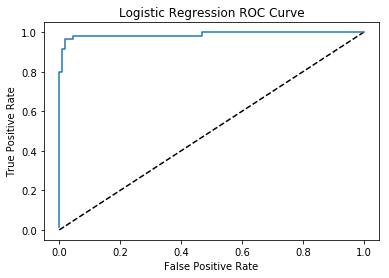

In [50]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve

#returns the probability of a given sample being in a particular class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve (y_test, y_pred_prob)
plt.plot ([0, 1], [0, 1], 'k--')
plt.plot (fpr, tpr, label = 'Logistic Regression')
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ('Logistic Regression ROC Curve')
plt.show()


In [51]:
#AUC in scikit-learn
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=42)
logreg.fit (X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc_score (y_test, y_pred_prob)



0.98938835666912306

In [52]:
#AUC using cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score (logreg, X, y, cv=5, scoring = 'roc_auc')
print (cv_scores)

[ 0.99673203  0.99183007  0.99583796  1.          0.96140652]


In [53]:

#GridSearchCV in scikit-learn
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn= KNeighborsClassifier()
knn_cv = GridSearchCV (knn, param_grid, cv=5)
knn_cv.fit (X, y)
knn_cv.best_params_
knn_cv.best_score_

0.93103448275862066